## Visualization Part 2

In [8]:
#Things to import
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

#pip install folium
import folium
import folium.plugins as plugins

import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [9]:
#Load data
df_water = pd.read_csv('viz_csvs/Water_Consumption_In_The_New_York_City.csv')
df_rest = pd.read_csv('viz_csvs/BK_Rest_Inspections.csv')
df_parking = pd.read_csv('viz_csvs/DOF_Parking_Violation_Codes.csv')
crashes_2019=pd.read_csv('viz_csvs/Vehicle_Collisions_2019.csv')

### Going over hw exercises

#### Easy

Make a bar chart of the number of different resturaunt inspection types

In [7]:
df_rest.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41401773,DUNKIN' DONUTS,BROOKLYN,721,FLATBUSH AVENUE,11226.0,7189406864,Donuts,08/19/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,08/19/2016,03/24/2019,Cycle Inspection / Initial Inspection
1,41474967,TAQUERIA LA PLACITA PUEBLA,BROOKLYN,830,BROADWAY,11206.0,7183021092,Mexican,09/12/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,09/12/2016,03/24/2019,Cycle Inspection / Initial Inspection
2,50039282,STERLING AFFAIR,BROOKLYN,250,JORALEMON ST,11201.0,7187807525,American,09/21/2018,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,5.0,A,09/21/2018,03/24/2019,Cycle Inspection / Initial Inspection
3,41162683,DUNKIN' DONUTS,BROOKLYN,1427,LINDEN BOULEVARD,11212.0,7183856338,Donuts,08/08/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,12.0,A,08/08/2017,03/24/2019,Cycle Inspection / Re-inspection
4,50068366,EL AMBIENTE,BROOKLYN,2896,FULTON ST,11207.0,3476272542,Spanish,06/26/2018,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,7.0,A,06/26/2018,03/24/2019,Cycle Inspection / Re-inspection


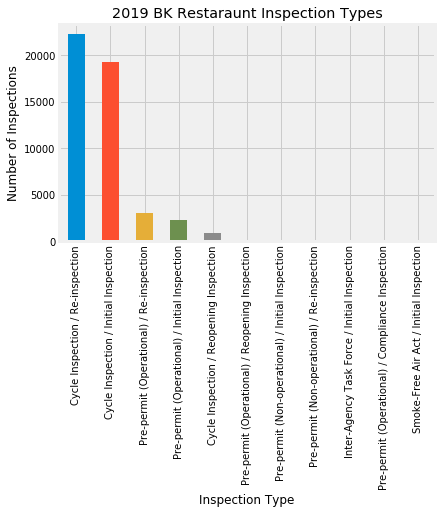

In [8]:
df_rest['INSPECTION TYPE'].value_counts().plot.bar();
plt.title('2019 BK Restaraunt Inspection Types');
plt.xlabel('Inspection Type');
plt.ylabel('Number of Inspections');

Make a histogram of resturaunt scores (Lower scores are better than higher scores)

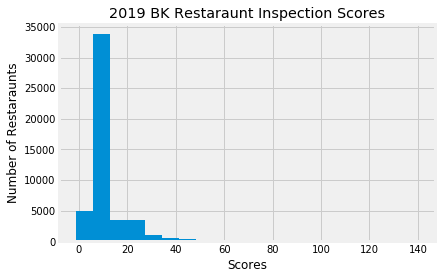

In [9]:
df_rest['SCORE'].hist(bins=20);
plt.title('2019 BK Restaraunt Inspection Scores');
plt.xlabel('Scores');
plt.ylabel('Number of Restaraunts');

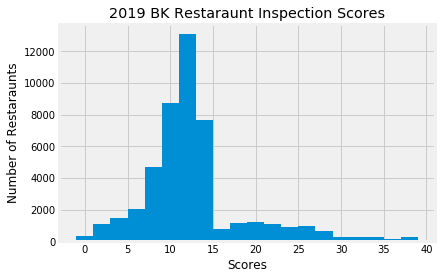

In [10]:
df_rest[df_rest['SCORE']<40]['SCORE'].hist(bins=20);
plt.title('2019 BK Restaraunt Inspection Scores');
plt.xlabel('Scores');
plt.ylabel('Number of Restaraunts');

Make a map of the first 100 vehicle collisions using a different color and marker size

In [26]:
m = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="stamenwatercolor")

for i in range(0,100):
    folium.Circle(
      location=[crashes_2019.iloc[i]['LATITUDE'], crashes_2019.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=200,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)

In [27]:
m

#### Medium

Make a bar chart of the top 10 restaraunt Cuisine Descriptions

In [36]:
df_rest.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41401773,DUNKIN' DONUTS,BROOKLYN,721,FLATBUSH AVENUE,11226.0,7189406864,Donuts,08/19/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,11.0,A,08/19/2016,03/24/2019,Cycle Inspection / Initial Inspection
1,41474967,TAQUERIA LA PLACITA PUEBLA,BROOKLYN,830,BROADWAY,11206.0,7183021092,Mexican,09/12/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,09/12/2016,03/24/2019,Cycle Inspection / Initial Inspection
2,50039282,STERLING AFFAIR,BROOKLYN,250,JORALEMON ST,11201.0,7187807525,American,09/21/2018,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,5.0,A,09/21/2018,03/24/2019,Cycle Inspection / Initial Inspection
3,41162683,DUNKIN' DONUTS,BROOKLYN,1427,LINDEN BOULEVARD,11212.0,7183856338,Donuts,08/08/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,12.0,A,08/08/2017,03/24/2019,Cycle Inspection / Re-inspection
4,50068366,EL AMBIENTE,BROOKLYN,2896,FULTON ST,11207.0,3476272542,Spanish,06/26/2018,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,7.0,A,06/26/2018,03/24/2019,Cycle Inspection / Re-inspection


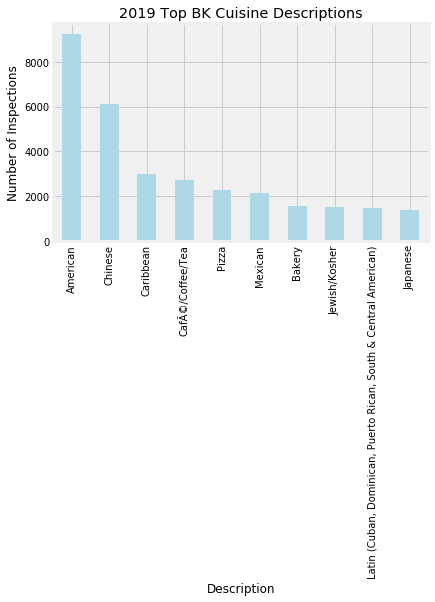

In [46]:
df_rest['CUISINE DESCRIPTION'].value_counts()[:10].plot.bar(color='lightblue');
plt.title('2019 Top BK Cuisine Descriptions');
plt.xlabel('Description');
plt.ylabel('Number of Inspections');

Make a bar chart of the top 10 restaraunt Violation Descriptions

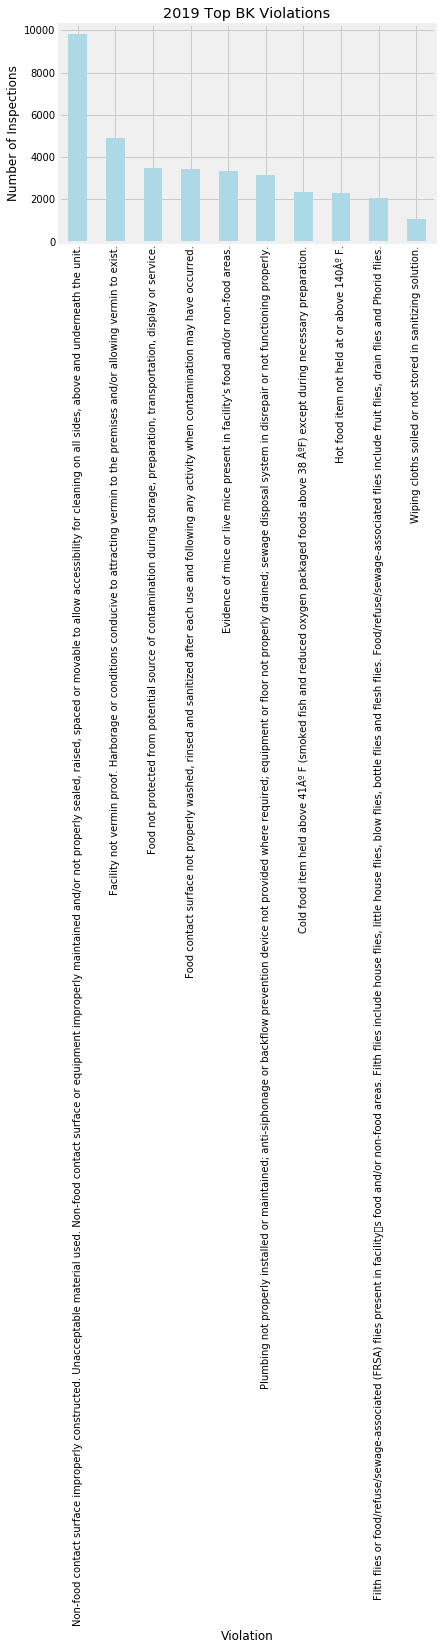

In [48]:
df_rest['VIOLATION DESCRIPTION'].value_counts()[:10].plot.bar(color='lightblue');
plt.title('2019 Top BK Violations');
plt.xlabel('Violation');
plt.ylabel('Number of Inspections');

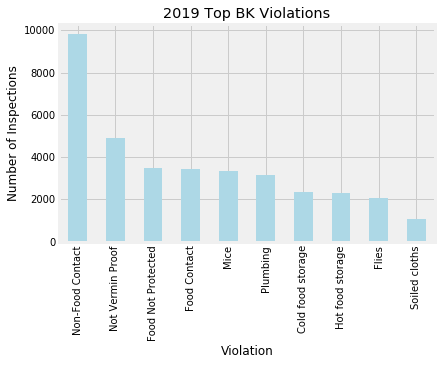

In [53]:
xtitles=['Non-Food Contact','Not Vermin Proof','Food Not Protected','Food Contact','Mice','Plumbing',
        'Cold food storage','Hot food storage','Flies','Soiled cloths']

df_rest['VIOLATION DESCRIPTION'].value_counts()[:10].plot.bar(color='lightblue');
plt.title('2019 Top BK Violations');
plt.xlabel('Violation');
plt.ylabel('Number of Inspections');

plt.xticks(range(10),xtitles);

Make a map with 2 different markers, one for Contributing Factor Vehicle 1 Aggressive Driving/Road Rage and one for Contributing Factor Vehicle 1 Glare

In [55]:
crashes_2019.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Zip Codes,Borough Boundaries,City Council Districts,Community Districts,Police Precincts
0,03/23/2019,4:19,MANHATTAN,10065.0,40.76297,-73.962160,"(40.76297, -73.96216)",NaN,NaN,301 EAST 63 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4102251,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,10090.0,4.0,1.0,23.0,11.0
1,03/23/2019,20:00,NaN,NaN,40.77958,-73.823320,"(40.77958, -73.82332)",22 AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4102000,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,14192.0,3.0,20.0,22.0,67.0
2,03/23/2019,6:15,MANHATTAN,10002.0,40.71997,-73.992905,"(40.71997, -73.992905)",DELANCEY STREET,CHRYSTIE STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4101841,Sedan,Pick-up Truck,NaN,NaN,NaN,11723.0,4.0,32.0,70.0,2.0
3,03/23/2019,20:30,NaN,NaN,40.69283,-73.854680,"(40.69283, -73.85468)",90 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passenger Distraction,Unspecified,NaN,NaN,NaN,4102370,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,24017.0,3.0,41.0,46.0,60.0
4,03/23/2019,17:59,MANHATTAN,10006.0,40.70983,-74.014680,"(40.70983, -74.01468)",WEST STREET,ALBANY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unsafe Lane Changing,NaN,NaN,NaN,4102261,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,11727.0,4.0,32.0,56.0,1.0


In [51]:
road_rage=crashes_2019[crashes_2019['CONTRIBUTING FACTOR VEHICLE 1']=='Aggressive Driving/Road Rage']

In [52]:
glare=crashes_2019[crashes_2019['CONTRIBUTING FACTOR VEHICLE 1']=='Glare']

In [53]:
m = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="stamenwatercolor")

for i in range(len(road_rage)):
    folium.Circle(
      location=[road_rage.iloc[i]['LATITUDE'], road_rage.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=100,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(m)
    
for i in range(len(glare)):
    folium.Circle(
      location=[glare.iloc[i]['LATITUDE'], glare.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=100,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)
    
m

#### Hard

Make a map of 100 vehicle collisions using different colors for day and night

In [44]:
crashes_2019['TIME']=pd.to_datetime(crashes_2019['TIME'])

In [45]:
crashes_2019 = crashes_2019.set_index(crashes_2019['TIME'])

In [46]:
day_crashes = crashes_2019.between_time('6:00', '20:00')

In [47]:
night_crashes = crashes_2019.between_time('20:00', '6:00')

In [49]:
m = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="stamenwatercolor")

for i in range(0,500):
    folium.Circle(
      location=[day_crashes.iloc[i]['LATITUDE'], day_crashes.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=100,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(m)
    
for i in range(0,500):
    folium.Circle(
      location=[night_crashes.iloc[i]['LATITUDE'], night_crashes.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=100,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)
    
m

Make a stacked bar chart showing the critical/non critical flags for the top 3 resturaunt chains

In [97]:
df_rest['DBA'].value_counts()

DUNKIN' DONUTS                                        602
CROWN FRIED CHICKEN                                   298
MCDONALD'S                                            297
SUBWAY                                                286
DOMINO'S                                              206
GOLDEN KRUST CARIBBEAN BAKERY & GRILL                 205
STARBUCKS                                             188
BURGER KING                                           167
DUNKIN' DONUTS, BASKIN ROBBINS                        153
POPEYES LOUISIANA KITCHEN                             138
KENNEDY FRIED CHICKEN                                 113
CHECKERS                                              109
KFC                                                   105
PAPA JOHN'S                                            77
WENDY'S                                                73
LITTLE CAESARS                                         67
FISHERMAN'S COVE                                       66
CHIPOTLE MEXIC

In [98]:
top3=df_rest['DBA'].value_counts().index[:3]

In [99]:
top3_rest = df_rest[df_rest['DBA'].isin(top3)]

In [104]:
top3_counts = top3_rest.groupby(['DBA','CRITICAL FLAG'])['INSPECTION DATE'].count().sort_index()

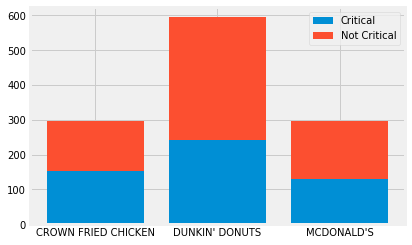

In [125]:
xs = [0,1,2];
plt.bar(xs,top3_counts.values[0::3]);
plt.bar(xs,top3_counts.values[2::3],bottom=top3_counts.values[0::3]);
plt.xticks(xs,[i[0] for i in top3_counts.index][::3]);
plt.legend(['Critical','Not Critical']);

Create your own custom map or chart!

In [127]:
crashes_2019['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           10878
Unspecified                                               9718
Following Too Closely                                     3552
Failure to Yield Right-of-Way                             3223
Backing Unsafely                                          1985
Passing Too Closely                                       1806
Passing or Lane Usage Improper                            1783
Other Vehicular                                           1289
Unsafe Lane Changing                                      1252
Turning Improperly                                         916
Traffic Control Disregarded                                689
Pavement Slippery                                          685
Reaction to Uninvolved Vehicle                             655
Unsafe Speed                                               576
Driver Inexperience                                        568
Alcohol Involvement                                    

In [128]:
crashes_2019['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                                              28969
Driver Inattention/Distraction                            2514
Following Too Closely                                      603
Other Vehicular                                            559
Passing or Lane Usage Improper                             430
Failure to Yield Right-of-Way                              356
Passing Too Closely                                        340
Unsafe Lane Changing                                       216
Backing Unsafely                                           182
Traffic Control Disregarded                                144
Unsafe Speed                                               119
Turning Improperly                                         116
Driver Inexperience                                        115
Reaction to Uninvolved Vehicle                             114
Pavement Slippery                                          107
View Obstructed/Limited                                

In [129]:
interested = ['Following Too Closely','Pavement Slippery','Unsafe Speed','Alcohol Involvement',
              'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Obstruction/Debris']

In [39]:
temp=crashes_2019[(crashes_2019['CONTRIBUTING FACTOR VEHICLE 1']=='Unsafe Speed') | 
                  (crashes_2019['CONTRIBUTING FACTOR VEHICLE 2']=='Unsafe Speed')]    

In [40]:
m = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="stamenwatercolor")

for i in range(len(temp)):
    folium.Circle(
      location=[temp.iloc[i]['LATITUDE'], temp.iloc[i]['LONGITUDE']],
      #popup=data.iloc[i]['name'],
      radius=100,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)

In [41]:
m

### For Loops!

Repeat some process over and over (and over!) again.

##### Some examples:

In [2]:
example_list = [2,4,6,8]

In [4]:
for i in example_list:
    print(i)

2
4
6
8


In [56]:
el2 = [1,'hi',3,4]
for i in el2:
    print(i)

1
hi
3
4


In [57]:
for i in range(5):
    print(i)

0
1
2
3
4


In [58]:
list(range(5))

[0, 1, 2, 3, 4]

In [59]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [60]:
list(range(1,8,2))

[1, 3, 5, 7]

In [20]:
food_types=df_rest['CUISINE DESCRIPTION'].value_counts()[:10].index

In [21]:
for t in food_types:
    print(t)

American
Chinese
Caribbean
CafÃ©/Coffee/Tea
Pizza
Mexican
Bakery
Jewish/Kosher
Latin (Cuban, Dominican, Puerto Rican, South & Central American)
Japanese


##### Add values to a new list:

In [5]:
new_list=[]

for num in range(10):
    new_list.append(num+3)

##### Enumerate:

In [12]:
df_rest['DBA'].value_counts()[:10].index

Index(['DUNKIN' DONUTS', 'CROWN FRIED CHICKEN', 'MCDONALD'S', 'SUBWAY',
       'DOMINO'S', 'GOLDEN KRUST CARIBBEAN BAKERY & GRILL', 'STARBUCKS',
       'BURGER KING', 'DUNKIN' DONUTS, BASKIN ROBBINS',
       'POPEYES LOUISIANA KITCHEN'],
      dtype='object')

In [14]:
rest_titles=list(df_rest['DBA'].value_counts()[:10].index)

for i, rest in enumerate(rest_titles):
    print((i,title))

(0, "DUNKIN' DONUTS")
(1, 'CROWN FRIED CHICKEN')
(2, "MCDONALD'S")
(3, 'SUBWAY')
(4, "DOMINO'S")
(5, 'GOLDEN KRUST CARIBBEAN BAKERY & GRILL')
(6, 'STARBUCKS')
(7, 'BURGER KING')
(8, "DUNKIN' DONUTS, BASKIN ROBBINS")
(9, 'POPEYES LOUISIANA KITCHEN')


In [17]:

for i, rest in enumerate(rest_titles):
    rest_titles[i] = rest.title()

In [18]:
rest_titles

["Dunkin' Donuts",
 'Crown Fried Chicken',
 "Mcdonald'S",
 'Subway',
 "Domino'S",
 'Golden Krust Caribbean Bakery & Grill',
 'Starbucks',
 'Burger King',
 "Dunkin' Donuts, Baskin Robbins",
 'Popeyes Louisiana Kitchen']

#### Loops Homework

##### Pure loops

Use a loop to create a list of numbers between 5 and 10

Use a loop to create a list of odd numbers between 1 and 9

Use a loop to take a list of Farenheight Degrees (25,32,45,79,100) and convert them to celcius C = (F - 32) * 5/9

Use a loop at a print statement and some symbols to make a fun design

Make a list of words that you like. Use a loop to take words in a random order (google how to generate a random number in python!) from that list and print them out in a poem

##### Loops with Charts

Use a loop to create bar charts for the top 10 value counts for several columns in one of the data sets we used above

##### Loops with your own files

Take an excel file that you work with. Read it into python (pd.read_csv). Change something within it using a loop. Make a visualization. Export it to a csv (pd.to_csv)